<a href="https://colab.research.google.com/github/rayisl78/Image-Processing/blob/master/ctgans_iris_synthetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
# Written Executed by Dr. Ray Islam on 04/04/2023 @ 9pm
# Important Disclosure: The author assumes no liability for the accuracy of the data provided, as it is solely intended for personal research purposes. 
# Please use this code at your own risk and assume full responsibility for any consequences that may arise from its use.
# written in google co-lab


# Import libraries
import torch
import pandas as pd
import seaborn as sns
import torch.nn as nn

In [46]:
# Install CTGAN

!pip install ctgan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
# Install table evaluator to analyze generated synthetic data

!pip install table_evaluator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
from ctgan import CTGAN
from ctgan.synthesizers.ctgan import Generator

In [119]:
# Import training Data
data = pd.read_csv('./GenAI.csv')

In [120]:
# View training data
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,I. setosa
1,4.9,3.0,1.4,0.2,I. setosa
2,4.7,3.2,1.3,0.2,I. setosa
3,4.6,3.1,1.5,0.2,I. setosa
4,5.0,3.6,1.4,0.3,I. setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,I. virginica
146,6.3,2.5,5.0,1.9,I. virginica
147,6.5,3.0,5.2,2.0,I. virginica
148,6.2,3.4,5.4,2.3,I. virginica


In [121]:
# Declare Categorical Columns

categorical_features = ['species']

In [122]:
# Declare Continuous Columns

continuous_cols = ['sepal_length', 'sepal_width', 'petal_length','petal_width']

In [53]:
# Train Model

from ctgan import CTGAN

ctgan = CTGAN(verbose=True)
ctgan.fit(data, categorical_features, epochs = 100000)

Streaming output truncated to the last 5000 lines.
Epoch 95001, Loss G: -0.0306,Loss D: -0.3004
Epoch 95002, Loss G: -0.4208,Loss D:  0.0467
Epoch 95003, Loss G: -0.3362,Loss D: -0.0493
Epoch 95004, Loss G: -0.3440,Loss D: -0.1866
Epoch 95005, Loss G: -0.2309,Loss D: -0.0709
Epoch 95006, Loss G: -0.6646,Loss D:  0.3015
Epoch 95007, Loss G: -0.5719,Loss D: -0.2952
Epoch 95008, Loss G: -0.4534,Loss D: -0.1590
Epoch 95009, Loss G: -0.3483,Loss D:  0.3311
Epoch 95010, Loss G: -0.8866,Loss D: -0.1782
Epoch 95011, Loss G: -0.1224,Loss D:  0.1635
Epoch 95012, Loss G: -0.2469,Loss D:  0.0693
Epoch 95013, Loss G: -0.6161,Loss D: -0.1669
Epoch 95014, Loss G: -0.3897,Loss D: -0.0221
Epoch 95015, Loss G: -0.4133,Loss D: -0.2775
Epoch 95016, Loss G: -0.1590,Loss D: -0.2247
Epoch 95017, Loss G: -0.3502,Loss D:  0.3745
Epoch 95018, Loss G: -0.2823,Loss D:  0.4780
Epoch 95019, Loss G: -0.2334,Loss D:  0.0141
Epoch 95020, Loss G: -0.4659,Loss D:  0.2430
Epoch 95021, Loss G: -0.3114,Loss D: -0.2230
Epoc

In [123]:
# Generate synthetic_data

synthetic_data = ctgan.sample(50000)

In [124]:
# View synthetic_data

synthetic_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,7.426347,3.454680,6.538295,2.540555,I. virginica
1,6.572567,2.811809,6.032432,2.269528,I. virginica
2,5.264618,2.499526,4.121956,1.230361,I. versicolor
3,5.607288,2.683315,4.237704,1.447048,I. versicolor
4,5.502743,2.597811,3.977742,1.077282,I. versicolor
...,...,...,...,...,...
49995,5.271918,2.267153,3.897814,1.517047,I. versicolor
49996,5.760495,2.956360,3.821754,0.983316,I. versicolor
49997,5.535776,3.266747,1.435589,0.409223,I. setosa
49998,5.182033,3.155657,4.338474,1.106467,I. versicolor


In [125]:
# round continuous data to 1 decimal place
# assuming synthetic_data is a pandas DataFrame containing the generated data

continuous_cols = ['sepal_length', 'sepal_width','petal_length','petal_width' ]

for col in continuous_cols:
    synthetic_data[col] = synthetic_data[col].apply(lambda x: round(x, 1))

In [126]:
# View Synthetic Data
synthetic_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,7.4,3.5,6.5,2.5,I. virginica
1,6.6,2.8,6.0,2.3,I. virginica
2,5.3,2.5,4.1,1.2,I. versicolor
3,5.6,2.7,4.2,1.4,I. versicolor
4,5.5,2.6,4.0,1.1,I. versicolor
...,...,...,...,...,...
49995,5.3,2.3,3.9,1.5,I. versicolor
49996,5.8,3.0,3.8,1.0,I. versicolor
49997,5.5,3.3,1.4,0.4,I. setosa
49998,5.2,3.2,4.3,1.1,I. versicolor


In [127]:
# Export DataFrame to CSV file
synthetic_data.to_csv('Synthetic_IRIS_Data.csv', index=False)

In [128]:
# Convert DataFrame to a string
data_str = synthetic_data.to_string(index=False)

# Export data to text file
with open('Synthetic_IRIS_Data.txt', 'w') as f:
    f.write(data_str)

In [129]:
# Re-import after deleting negative rows
synthetic_data = pd.read_csv('./Synthetic_IRIS_Data_10.csv')


In [130]:
# View Synthetic Data
synthetic_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.3,2.6,4.4,1.3,I. versicolor
1,5.0,2.8,4.2,1.4,I. versicolor
2,6.0,2.7,4.4,1.5,I. versicolor
3,6.3,2.4,5.7,1.8,I. virginica
4,5.7,3.1,1.7,0.6,I. setosa
...,...,...,...,...,...
49684,7.1,3.2,6.3,2.4,I. virginica
49685,6.0,3.3,4.4,1.2,I. versicolor
49686,5.4,3.5,1.8,0.5,I. setosa
49687,5.9,3.2,4.6,1.5,I. versicolor


(150, 5) (49689, 5)


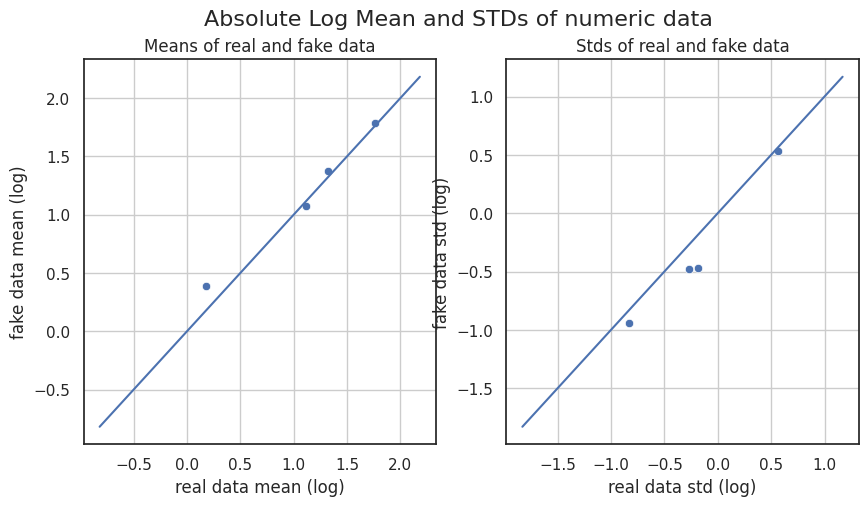

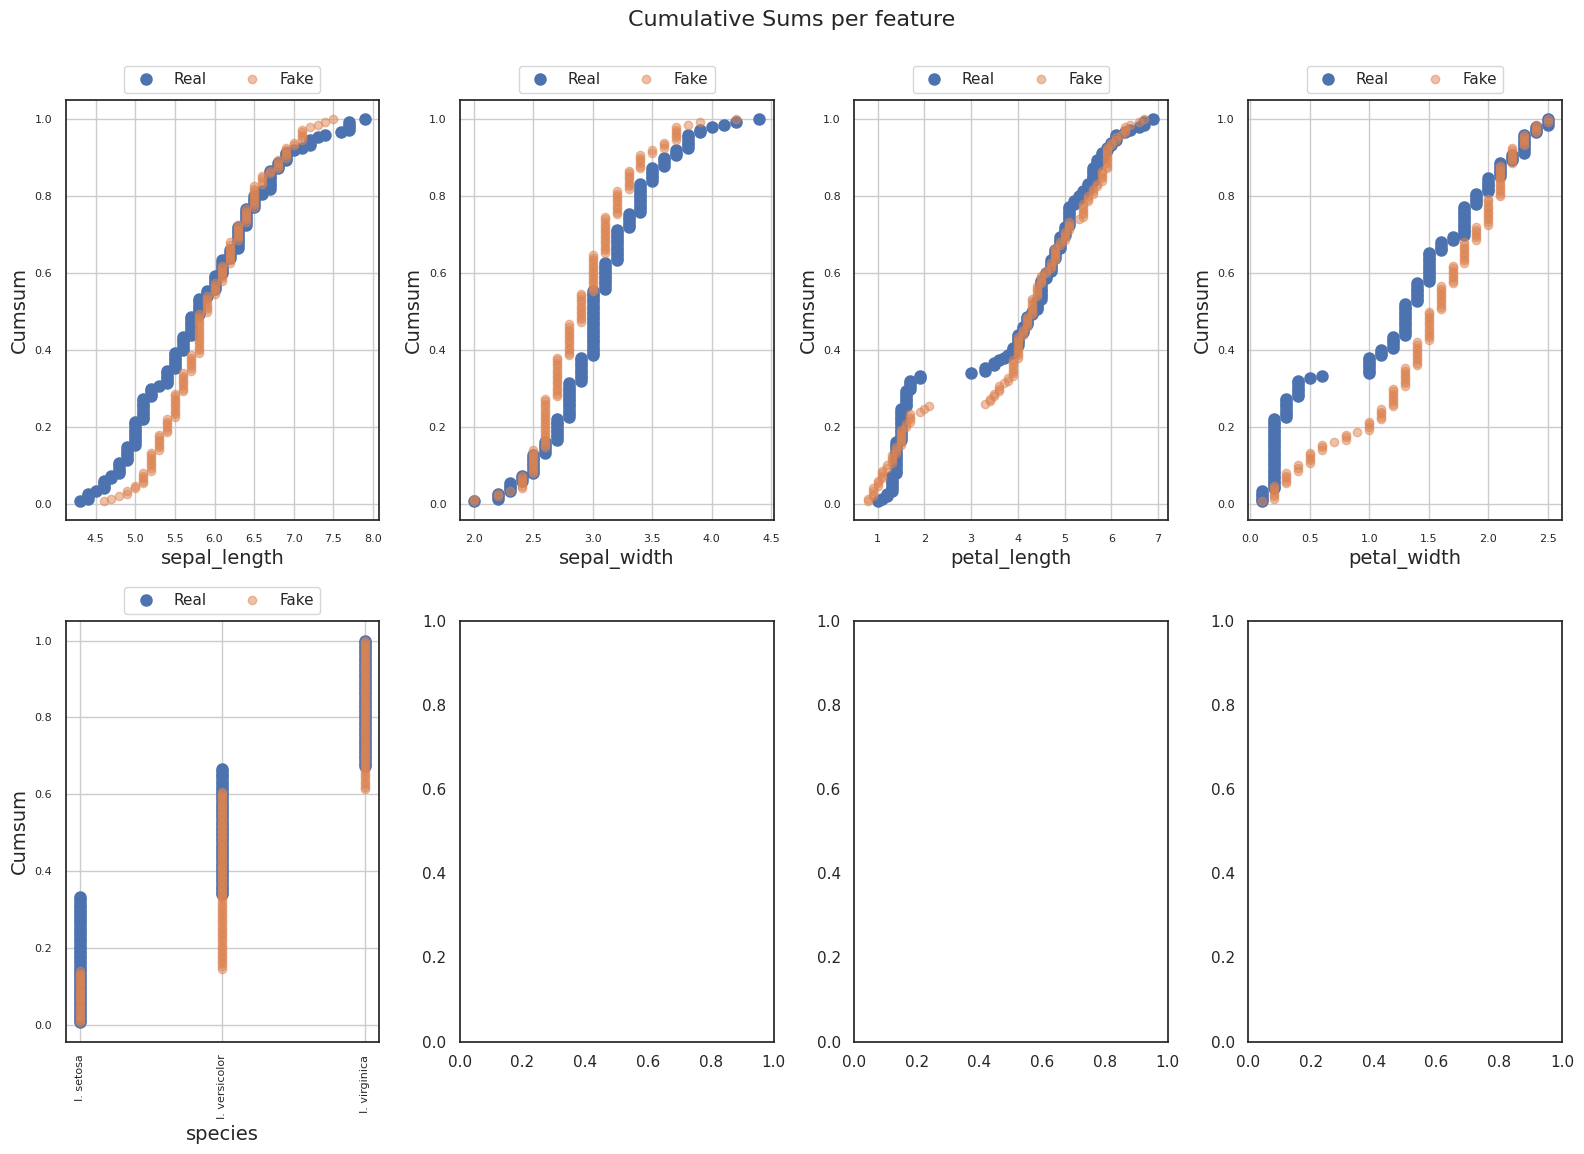

/usr/local/lib/python3.9/dist-packages/table_evaluator/table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
/usr/local/lib/python3.9/dist-packages/table_evaluator/table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
/usr/local/lib/python3.9/dist-packages/table_evaluator/table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self

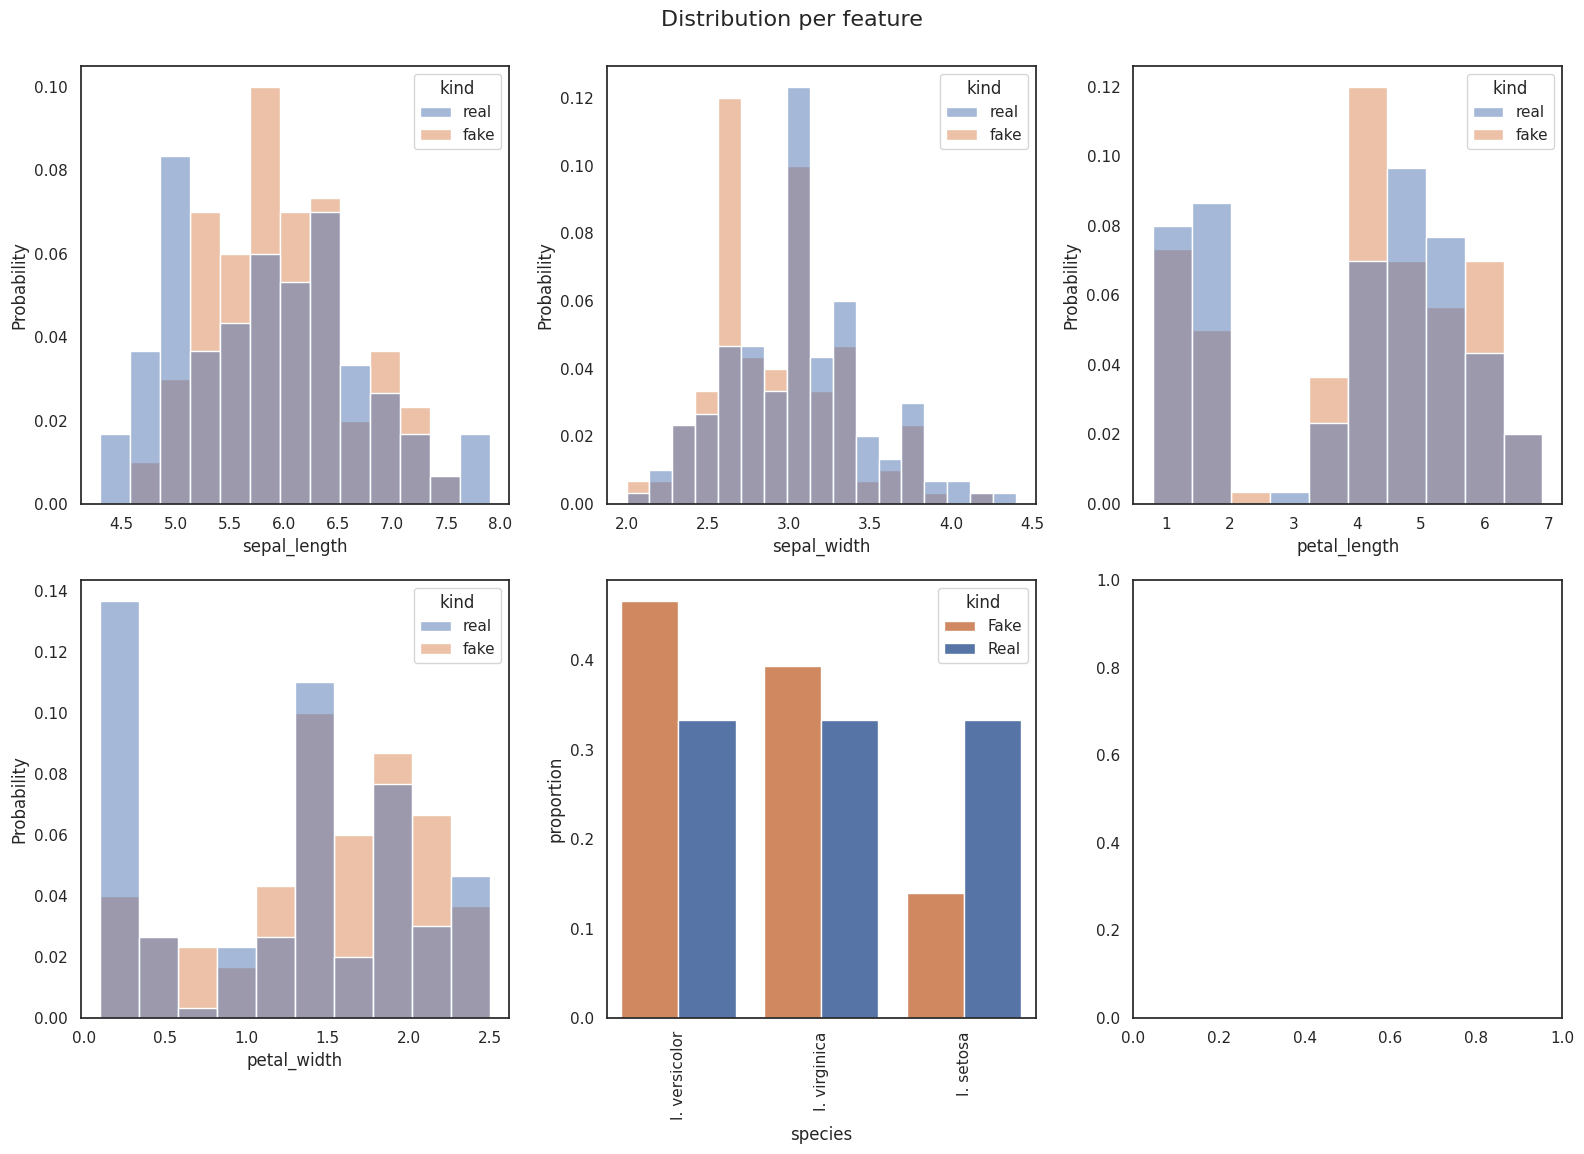

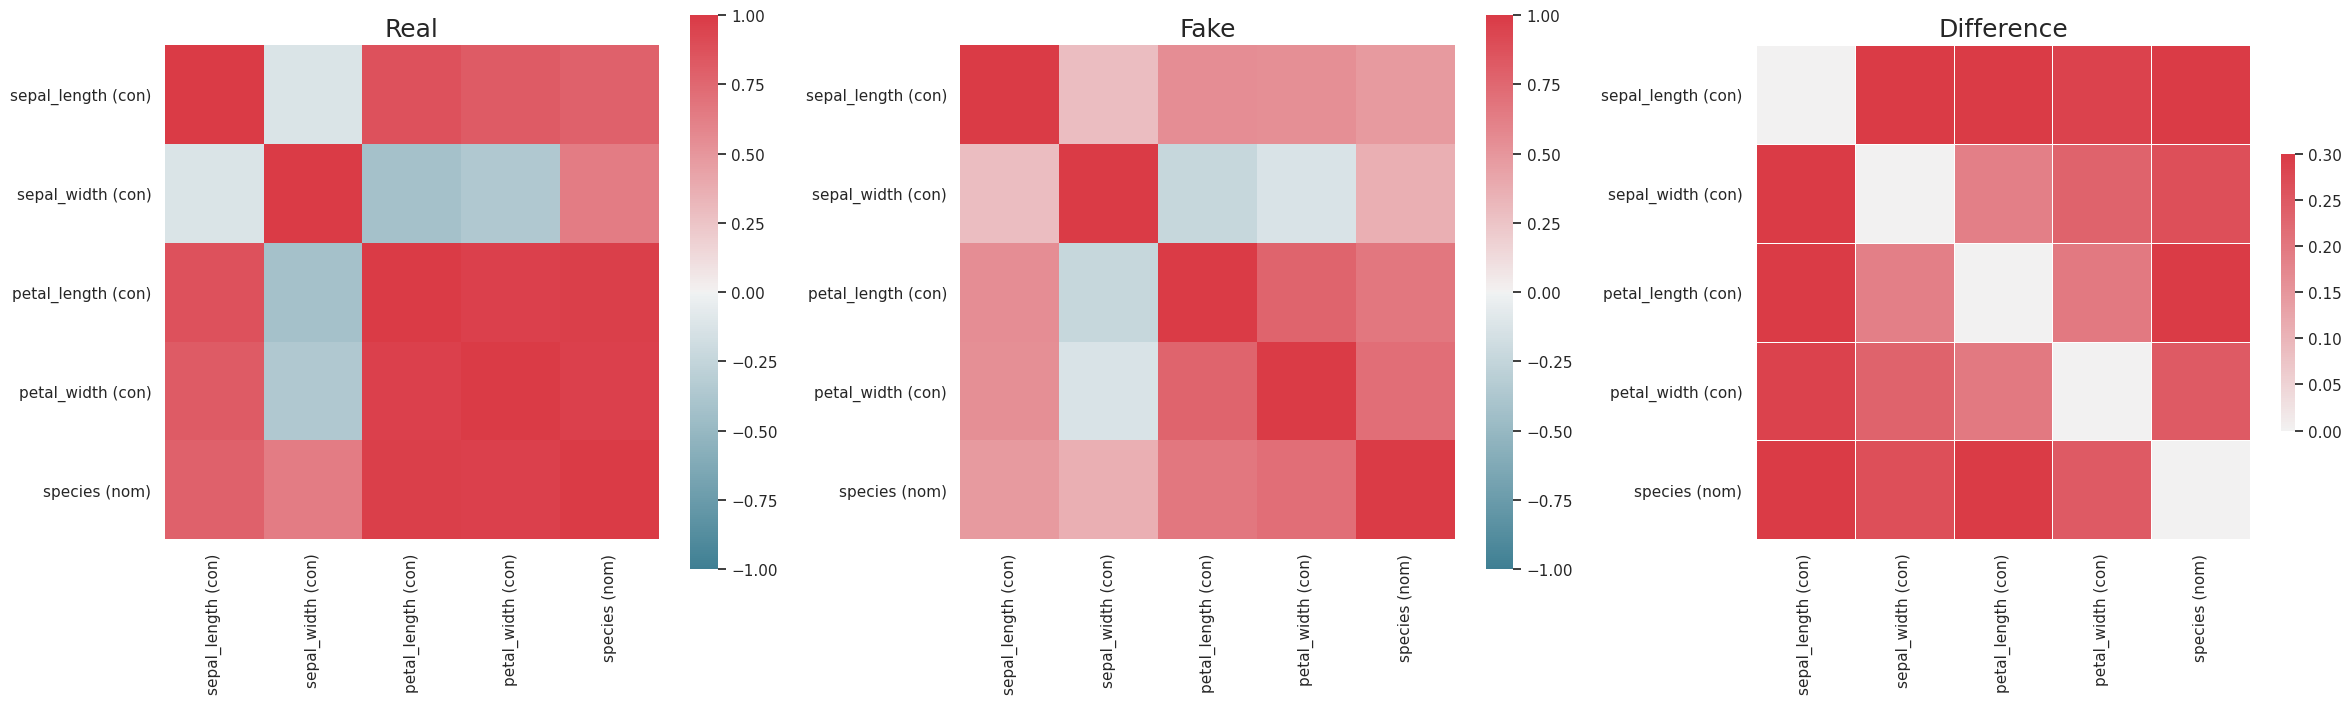

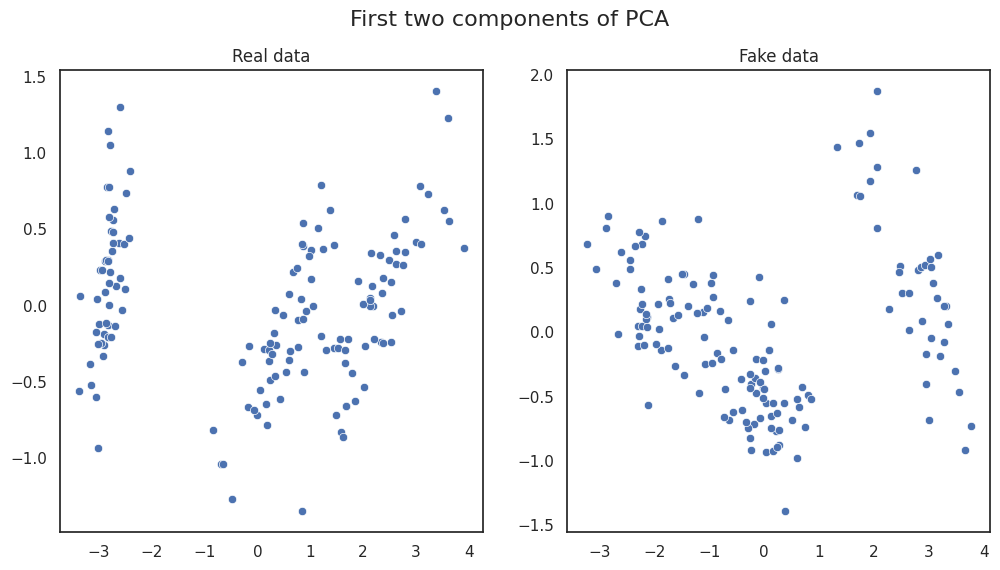

In [131]:
# Analyze Synthetic Data

from table_evaluator import TableEvaluator

print(data.shape, synthetic_data.shape)
table_evaluator =  TableEvaluator(data, synthetic_data, cat_cols= categorical_features)

table_evaluator.visual_evaluation()

<Axes: >

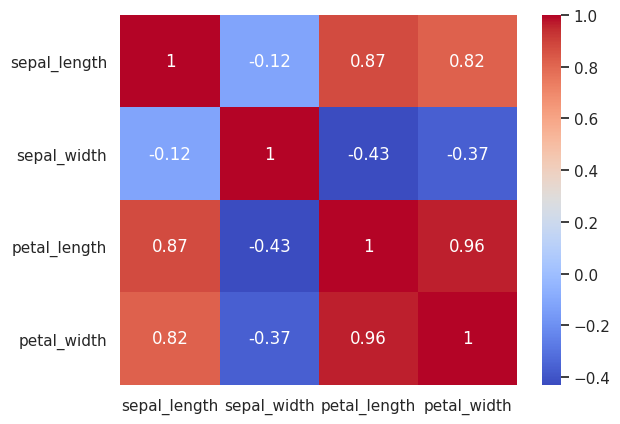

In [132]:
# compute the correlation matrix
corr = data.corr()

# plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

<Axes: >

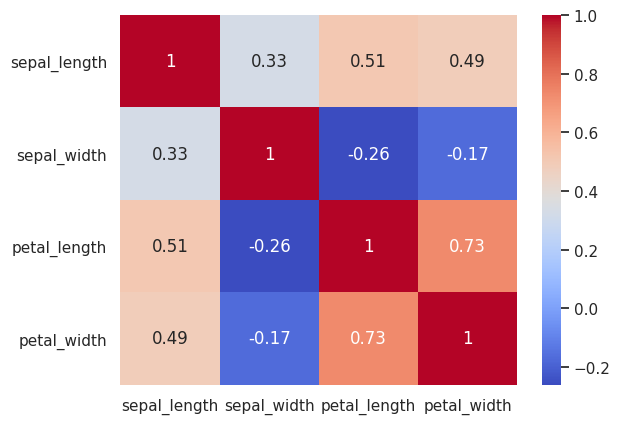

In [133]:
# compute the correlation matrix
corr = synthetic_data.corr()

# plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [134]:
#show summary statistics REAL DATA
summary = data.describe()
print(summary)

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.200000
std        0.828066     0.435866      1.765298     0.761401
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [76]:
#show summary statistics SYNTHETIC DATA
summary = synthetic_data.describe()
print(summary)

       sepal_length   sepal_width  petal_length   petal_width
count  49693.000000  49693.000000  49693.000000  49693.000000
mean       5.880438      2.941956      3.730391      1.369827
std        0.585488      0.395276      1.747931      0.654594
min        4.100000      1.700000      0.500000      0.100000
25%        5.500000      2.700000      1.700000      1.000000
50%        5.800000      2.900000      4.200000      1.400000
75%        6.200000      3.200000      5.100000      1.900000
max        8.200000      4.600000      7.300000      2.900000
